# Introduction

Notebook to test the implementation of mini-patching related functionality

In [1]:
import tensorflow as tf
import tenfem
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [2]:
mesh = tenfem.mesh.examples.star(0.2)
element = tenfem.reference_elements.TriangleElement(1)

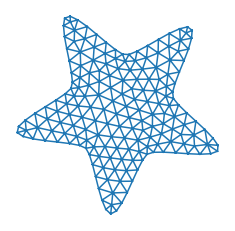

In [3]:
fig, ax = plt.subplots()
ax.triplot(mesh._triang)
ax.set_aspect('equal'); ax.axis('off')
plt.show()

In [4]:
submesh_provider = tenfem.layers.TaperedSubmeshProvider(mesh, element, 0.5)
submesh_provider._build_tapered_neighbors()
submesh_provider._build_mesh_neighborhood()

In [28]:
mesh_tensor_repr = submesh_provider(1.)
smesh = tenfem.mesh.utils.mesh_from_tensor_repr(mesh_tensor_repr, element)
smesh.add_matplotlib_tri()

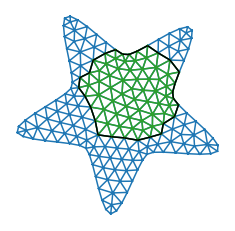

In [29]:
nodes, elems, node_t, bnd_elems = mesh_tensor_repr

fig, ax = plt.subplots()
ax.triplot(mesh._triang)
#ax.plot(*nodes.numpy().T, 'X', markeredgecolor='k')
ax.set_aspect('equal'); ax.axis('off')

ax.triplot(smesh._triang)

ax.add_collection(
    LineCollection(tf.gather(nodes, bnd_elems), colors='k'))

plt.show()